In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from typing import *
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

In [2]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

mushrooms = pd.read_csv(url_data, header=None, names=column_names)
# mushrooms = mushrooms.replace({'?': np.NaN})
mushrooms.shape

(8124, 23)

In [3]:

l = len(mushrooms.columns)
for i in range(l):
  print(mushrooms.columns[i], end=' ')
  print(mushrooms[mushrooms.columns[i]][0], end=" ")
  print(mushrooms[mushrooms.columns[i]].unique())



class p ['p' 'e']
cap-shape x ['x' 'b' 's' 'f' 'k' 'c']
cap-surface s ['s' 'y' 'f' 'g']
cap-color n ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises? t ['t' 'f']
odor p ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment f ['f' 'a']
gill-spacing c ['c' 'w']
gill-size n ['n' 'b']
gill-color k ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape e ['e' 't']
stalk-root e ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring s ['s' 'f' 'k' 'y']
stalk-surface-below-ring s ['s' 'f' 'y' 'k']
stalk-color-above-ring w ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring w ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type p ['p']
veil-color w ['w' 'n' 'o' 'y']
ring-number o ['o' 't' 'n']
ring-type p ['p' 'e' 'l' 'f' 'n']
spore-print-color k ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population s ['s' 'n' 'a' 'v' 'y' 'c']
habitat u ['u' 'g' 'm' 'd' 'p' 'w' 'l']


## Задание №1
Загрузить таблицу Mushroom из репозитория UCI (любого источника) в объект
DataFrame.
Вычислить распределение значений категориальных признаков по классам.
Визуализировать распределения. Разбить данные на обучающую и контрольную
выборки.

### Распределение категориальных признаков по классам

In [4]:
for col in column_names:
    print(mushrooms[col].value_counts(normalize=True))

e    0.517971
p    0.482029
Name: class, dtype: float64
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: cap-surface, dtype: float64
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: cap-color, dtype: float64
f    0.584441
t    0.415559
Name: bruises?, dtype: float64
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: odor, dtype: float64
f    0.974151
a    0.025849
Name: gill-attachment, dtype: float64
c    0.838503
w    0.161497
Name: gill-spacing, dtype: float64
b    0.690793
n    0.309207
Name: gill-size, dtype: float64
b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k    0.050222
e    0.011817
y    0.010586
o    0.007878
r    0.0029

[Текст ссылки](https://)### Визуализация распределений

e


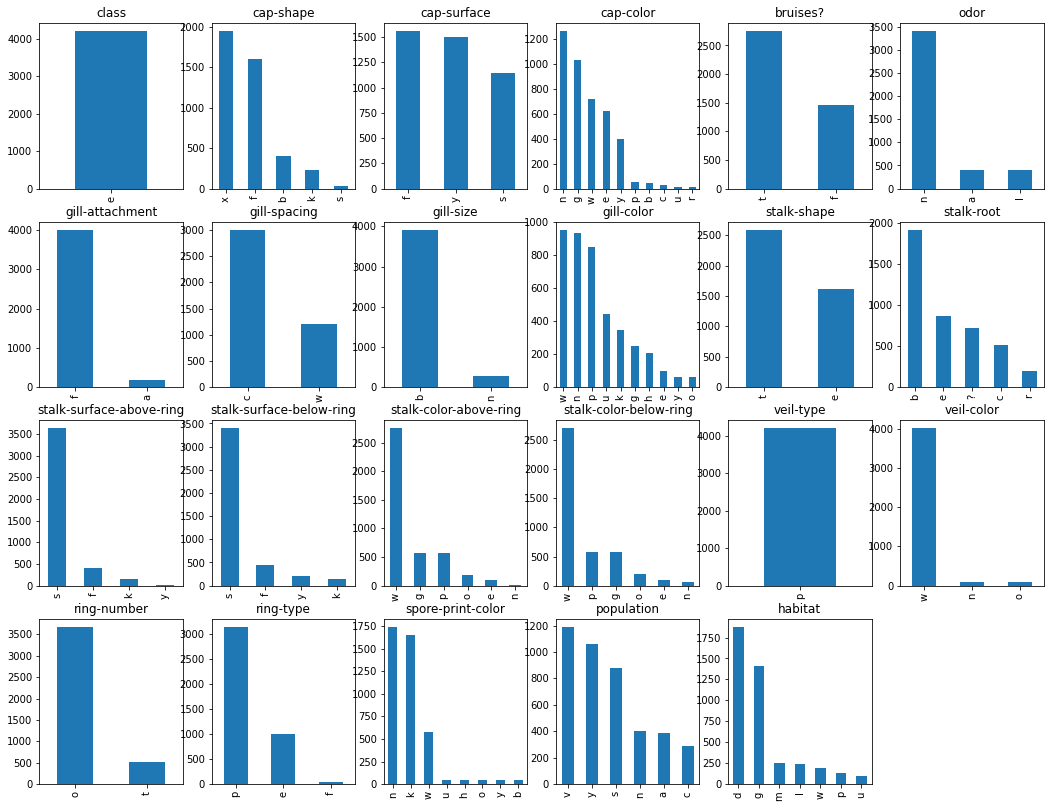

p


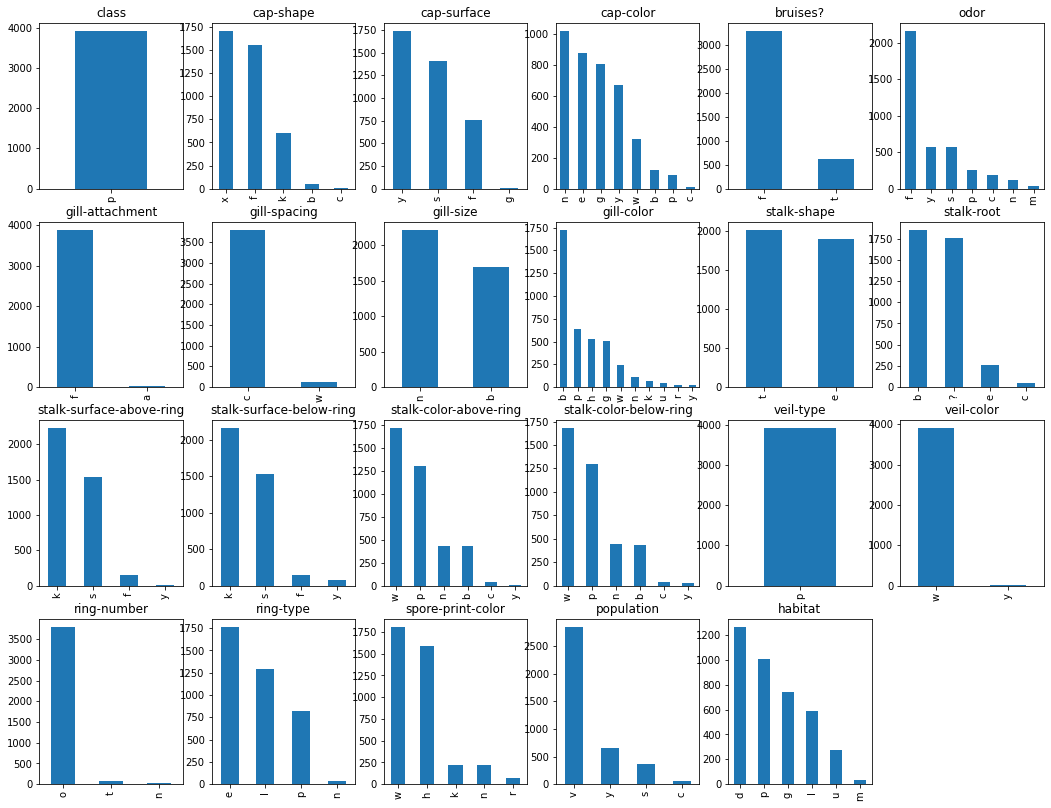

In [5]:
gb = mushrooms.groupby('class')    
for g in [(gb.get_group(x), x) for x in gb.groups]:
  print(g[1])
  g = g[0]
  plt.figure(figsize=(18, 14))
  for i, col in enumerate(column_names):
    plt.subplot(4, 6, i + 1)
    g[col].value_counts().plot(kind='bar')
    plt.title(col)
  plt.show()

In [6]:
mushrooms = mushrooms.drop(columns=['veil-type'])  # удаляем неинформативный признак

In [7]:
train, test = train_test_split(mushrooms, test_size=0.25, random_state=42)

## Задание №2
Построить решающую функцию по каждой переменной на основе частот. Сравнить
точность на обучающей и контрольной выборках. Найти наиболее информативную
переменную.

In [8]:
class FreqAnalysis():
    def __init__(self, feature_name):
        self.feature_name = feature_name
        self.rule = dict()
        self.categories = []
    
    def fit(self, X, y):
        self.categories += X[self.feature_name].unique().tolist()
        for cat in self.categories:
            self.rule[cat] = y[X[self.feature_name] == cat].value_counts().index.tolist()[0]
    def predict(self, X):
        return X[self.feature_name].map(self.rule)

### Найдем наиболее информативную переменную
Оценим значимость всех переменных и выделем наиболее значимую

In [9]:
feat_score = np.zeros(mushrooms.shape[1] - 1)

short_list = [col for col in train.columns if col != 'class'] 

best_feature_score = 0.
best_feature = None

# мы берём каждый признак по отдельности 
# и на основе частоты для каждого класса
# в этом признаке предиктим класс на тесте

# Пример: признак cap-surface, значения
# ('s','f','y','g')
# Находим, какой класс чаще имеет конкретные
# значения этого признака:
# {'x': 'e', 'f': 'e', 'k': 'p', 'b': 'e', 's': 'e', 'c': 'p'}
# значит, если у объекта в этом признаке будет 'x', мы предсказываем класс 'e'

for i, col in enumerate(short_list):
    clf = FreqAnalysis(col)
    clf.fit(train, train['class'])
    feat_score[i] = accuracy_score(test['class'], clf.predict(test))
    print(col, f"  train: {accuracy_score(train['class'], clf.predict(train)):.3}", f"test: {accuracy_score(test['class'], clf.predict(test)):.3}")
    if feat_score[i] > best_feature_score:
        best_feature_score = feat_score[i]
        best_feature = col

print('\n\n', 'Лучший результат на тестовой выборке:', sep='')
print(best_feature, best_feature_score)

cap-shape   train: 0.567 test: 0.557
cap-surface   train: 0.579 test: 0.584
cap-color   train: 0.596 test: 0.592
bruises?   train: 0.747 test: 0.734
odor   train: 0.985 test: 0.985
gill-attachment   train: 0.52 test: 0.512
gill-spacing   train: 0.613 test: 0.626
gill-size   train: 0.759 test: 0.747
gill-color   train: 0.805 test: 0.806
stalk-shape   train: 0.555 test: 0.548
stalk-root   train: 0.647 test: 0.644
stalk-surface-above-ring   train: 0.778 test: 0.763
stalk-surface-below-ring   train: 0.769 test: 0.758
stalk-color-above-ring   train: 0.717 test: 0.715
stalk-color-below-ring   train: 0.716 test: 0.709
veil-color   train: 0.521 test: 0.513
ring-number   train: 0.537 test: 0.542
ring-type   train: 0.774 test: 0.78
spore-print-color   train: 0.868 test: 0.869
population   train: 0.723 test: 0.719
habitat   train: 0.694 test: 0.68


Лучший результат на тестовой выборке:
odor 0.9852289512555391


## Задание №3
Построить «наивный» байесовский классификатор из sklearn. Оценить точность.

One Hot Encoding

In [10]:
mushrooms_OHE = pd.get_dummies(mushrooms[short_list])
mushrooms_OHE['class'] = mushrooms['class'].map({'e': 0, 'p': 1})

train_OHE = mushrooms_OHE.iloc[train.index]
test_OHE = mushrooms_OHE.iloc[test.index]

In [11]:
X_train, y_train = train_OHE.drop(columns='class').to_numpy(), train_OHE['class'].to_numpy()
X_test, y_test = test_OHE.drop(columns='class').to_numpy(), test_OHE['class'].to_numpy()

clf = BernoulliNB(binarize=None)
clf.fit(X_train, y_train)
print("Оценка точности «наивного» байесовского классификатора из sklearn")
print(clf.score(X_test, y_test))

Оценка точности «наивного» байесовского классификатора из sklearn
0.9369768586903003


## Задание №4
Самостоятельно реализовать метод, не используя готовый. Сравнить полученное
решение с библиотечным. Добавить регуляризатор в оценки частот.

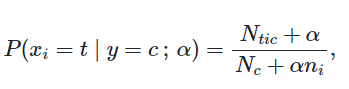

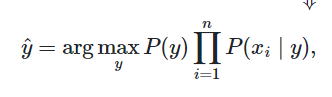

In [12]:
#Ntic - кол-во объектов, которые принадлежат данной категории для данного класса
#Nc - кол-во объектов, которые принадлежат классу по всем категориям
#alpha - параметр для избежания деления на 0
#ni - кол-во категорий

class MyNaiveBayes():
    def __init__(self):
        self.b0 = 0.
        self.b_vec = None
    
    def fit(self, X, y):
        N, M = X.shape
        N0 = N - y.sum()
        N1 = y.sum()
        P0 = N0 / N  # доля 0-й
        P1 = N1 / N  # доля 1

        self.b0 = np.log(P0 / P1)
        self.b_vec = np.zeros(M)
        for j in range(M):
            p_j = (X[y == 0][:, j].sum() + 1) / (N0 + 2)
            q_j = (X[y == 1][:, j].sum() + 1) / (N1 + 2)
            self.b0 += np.log((1 - p_j) / (1 - q_j))
            self.b_vec[j] = np.log((p_j * (1 - q_j)) / (q_j * (1 - p_j))) 

    def predict(self, X):
        N, M = X.shape
        y_pr = np.zeros(N)
        for i in range(N):
            y_pr[i] = (X[i, :] * self.b_vec).sum() + self.b0
            if y_pr[i] >= 0:
                y_pr[i] = 0
            else:
                y_pr[i] = 1
        return y_pr
    
    def score(self, X, y):
        if self.b_vec is not None:
            return(accuracy_score(y, self.predict(X)))
        else:
            return 'It isnt fited!'

In [13]:
myBNBclf = MyNaiveBayes()
myBNBclf.fit(X_train, y_train)
print("Оценка точности:")
myBNBclf.score(X_test, y_test)

Оценка точности:


0.9369768586903003

In [14]:
myBNBclf.b_vec

array([ 1.9526813 , -1.46709996, -0.04888478, -1.12584676,  3.14669824,
        0.12435629,  0.89179018, -1.17907583, -0.40878209, -0.36506818,
       -0.91561792,  0.77230814, -0.49275488,  0.25208942,  0.17073875,
       -0.42713   ,  2.40860404,  2.63269801,  0.83424682, -0.72370269,
       -2.3416733 ,  2.3416733 ,  5.71572114, -5.14268017, -8.27033512,
        5.68572693, -3.49093774,  4.92097235, -5.3417678 , -6.3344533 ,
       -6.28013266,  2.14383266, -2.14383266, -2.53241853,  2.53241853,
        2.9497991 , -2.9497991 , -7.83541383,  4.28830023, -0.88342851,
       -1.07447206,  1.66627391,  2.27180991,  3.7180717 ,  0.19425469,
       -2.97597846,  2.20207097,  1.52638318,  0.71582475, -0.42404793,
        0.42404793, -1.37088783, -0.06524846,  2.36446825,  1.36048673,
        4.9289089 ,  1.11703635, -3.67049861,  2.30143796,  0.32676728,
        1.14994875, -3.59842987,  1.89460276,  0.92654168, -5.98786481,
       -3.49093774,  4.301527  ,  6.16137744, -3.49257707,  4.92

In [15]:
myBNBclf.b0

5.229287336734877

####Задание 5

Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.

In [16]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None) 
 
cnt = df[0].value_counts() 
p0 = cnt['p']/cnt.sum() # вероятность класса p 
z0 = np.log(p0) - np.log(1.0 - p0)  
print(p0, z0) 
cnt


0.48202855736090594 -0.07191675076714477


e    4208
p    3916
Name: 0, dtype: int64

In [17]:
# 1) находим распределение значений категориальных признаков по классам
# Пример: признак cap-surface, значения
# ('s','f','y','g')
# Находим, сколько раз встретилось каждое значение у каждого класса:
# p: {'x': 1000, 'f': 200, 'k': 30, 'b': 0, 's': 230, 'c': 2000}
# e: {'x': 2320, 'f': 0, 'k': 10, 'b': 0, 's': 120, 'c': 0}
# 2) высчитываем вероятности каждого класса по категориальным признакам
# 3) высчитываем вероятности для каждого сэмпла
# 4) высчитываем вероятности, подвергнутые обратному лог. преобразованию
# 5) применяем логистическую регрессию к результату обратного преобразования
# 6) определяем значение класса по порогу (threshold)
threshold=0.5
# 7)  Фиксируем прибыль

for col in range(1,23): 
    res = pd.DataFrame()  
    f = df.groupby(col)[0].value_counts().unstack().fillna(0)
    f['prob'] = (f['p']+1)/(f['p']+f['e']+2)
    res[df.columns[col]] = df[col] 
    res['prob'] = df[col].map(lambda x: f.at[x,'prob'])  
    res['inv_sig'] = np.log(res['prob']) - np.log(1.0 - res['prob']) - z0 
    res['sig'] = 1.0/(1.0+np.exp(-(res['inv_sig']+z0)))                  
    res['pred'] = res['prob'].map(lambda x: 'e' if x<threshold else 'p')    
    print(res)

      1      prob   inv_sig       sig pred
0     x  0.467195 -0.059491  0.467195    e
1     x  0.467195 -0.059491  0.467195    e
2     b  0.107930 -2.040150  0.107930    e
3     x  0.467195 -0.059491  0.467195    e
4     x  0.467195 -0.059491  0.467195    e
...  ..       ...       ...       ...  ...
8119  k  0.724096  1.036790  0.724096    p
8120  x  0.467195 -0.059491  0.467195    e
8121  f  0.493659  0.046551  0.493659    e
8122  k  0.724096  1.036790  0.724096    p
8123  x  0.467195 -0.059491  0.467195    e

[8124 rows x 5 columns]
      2      prob   inv_sig       sig pred
0     s  0.552385  0.282227  0.552385    p
1     s  0.552385  0.282227  0.552385    p
2     s  0.552385  0.282227  0.552385    p
3     y  0.536352  0.217584  0.536352    p
4     s  0.552385  0.282227  0.552385    p
...  ..       ...       ...       ...  ...
8119  s  0.552385  0.282227  0.552385    p
8120  s  0.552385  0.282227  0.552385    p
8121  s  0.552385  0.282227  0.552385    p
8122  y  0.536352  0.217584  